### We now want to look at the '/workspace/DS4002Project3/DATA/incorrect_guesses_data.csv' file and see if there are any trends in image characteristics.

### Install the following libraries:

pip install pandas

pip install matplotlib

pip install seaborn

pip install scipy

/tmp/ipykernel_36164/3959479731.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=celebrity_counts.index, y=celebrity_counts.values, palette='viridis')


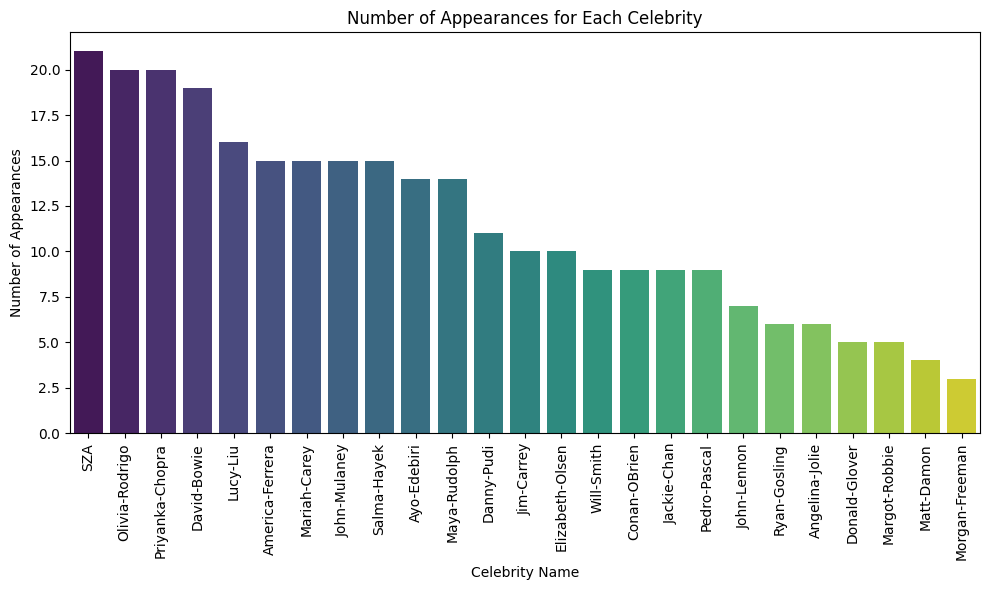

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (adjust the path as needed)
df = pd.read_csv("/workspace/DS4002Project3/DATA/incorrect_guesses_data.csv")

# Count the occurrences of each celebrity in the 'celebrity_name' column
celebrity_counts = df['celebrity_name'].value_counts()

# Create a bar graph using seaborn (you can also use matplotlib directly)
plt.figure(figsize=(10, 6))
sns.barplot(x=celebrity_counts.index, y=celebrity_counts.values, palette='viridis')

# Set the labels and title
plt.xlabel('Celebrity Name')
plt.ylabel('Number of Appearances')
plt.title('Number of Appearances for Each Celebrity')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()
plt.show()


### Let's look at the difference in ratios for misidentified test images between white & non-white celebs

/tmp/ipykernel_36164/3609529673.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_appearances.index, y=average_appearances.values, palette='coolwarm')


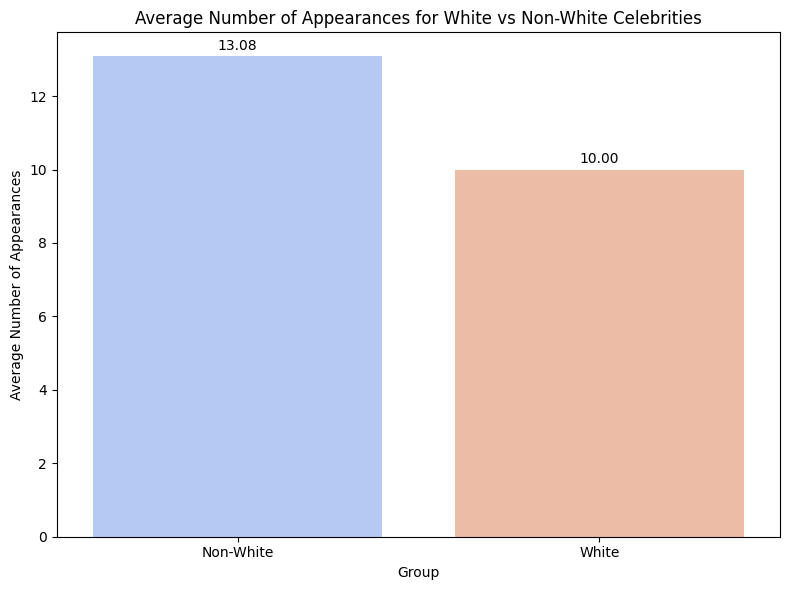

In [7]:
# Load the dataset
df = pd.read_csv("/workspace/DS4002Project3/DATA/incorrect_guesses_data.csv")

# Count the appearances for each celebrity in the 'celebrity_name' column
celebrity_counts = df['celebrity_name'].value_counts()

# Merge the celebrity counts with the original dataset to get the 'race' information
df_counts = df.drop_duplicates(subset='celebrity_name')[['celebrity_name', 'race']]
df_counts['appearances'] = df_counts['celebrity_name'].map(celebrity_counts)
df_counts['race_group'] = df_counts['race'].apply(lambda x: 'White' if x in ['White', 'White-Latina'] else 'Non-White')

# Group by race_group and calculate the average number of appearances
average_appearances = df_counts.groupby('race_group')['appearances'].mean()

# Create a bar graph comparing the average number of appearances for each group
plt.figure(figsize=(8, 6))
sns.barplot(x=average_appearances.index, y=average_appearances.values, palette='coolwarm')

# Set the labels and title
plt.xlabel('Group')
plt.ylabel('Average Number of Appearances')
plt.title('Average Number of Appearances for White vs Non-White Celebrities')

# Add the average values on top of the bars
for i, v in enumerate(average_appearances.values):
    plt.text(i, v + 0.1, f'{v:.2f}', ha='center', va='bottom', fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()

### The average number of misidentifactions was higher for non-white celebs than for white celebs. We can test significance

In [2]:
import pandas as pd
from scipy import stats

# Load the dataset
df = pd.read_csv("/workspace/DS4002Project3/DATA/incorrect_guesses_data.csv")

# Count the appearances for each celebrity in the 'celebrity_name' column
celebrity_counts = df['celebrity_name'].value_counts()

# Merge the celebrity counts with the original dataset to get the 'race' information
df_counts = df.drop_duplicates(subset='celebrity_name')[['celebrity_name', 'race']]
df_counts['appearances'] = df_counts['celebrity_name'].map(celebrity_counts)

# Modify the filtering to treat 'White' and 'White-Latina' as the same group
df_counts['race_group'] = df_counts['race'].apply(lambda x: 'White' if x in ['White', 'White-Latina'] else 'Non-White')

# Separate the data into two groups: White and Non-White
white_celebs = df_counts[df_counts['race_group'] == 'White']['appearances']
non_white_celebs = df_counts[df_counts['race_group'] == 'Non-White']['appearances']

# Perform an independent two-sample t-test
t_stat, p_value = stats.ttest_ind(white_celebs, non_white_celebs)

# Print the t-statistic and p-value
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpret the result
if p_value < 0.05:
    print("The difference in appearance counts is statistically significant (p < 0.05).")
else:
    print("The difference in appearance counts is not statistically significant (p >= 0.05).")


T-statistic: -1.4636
P-value: 0.1568
The difference in appearance counts is not statistically significant (p >= 0.05).


### Now, let's look at gender-based differences in image misidentifaction.

/tmp/ipykernel_36164/559304637.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_appearances_gender.index, y=average_appearances_gender.values, palette='coolwarm')


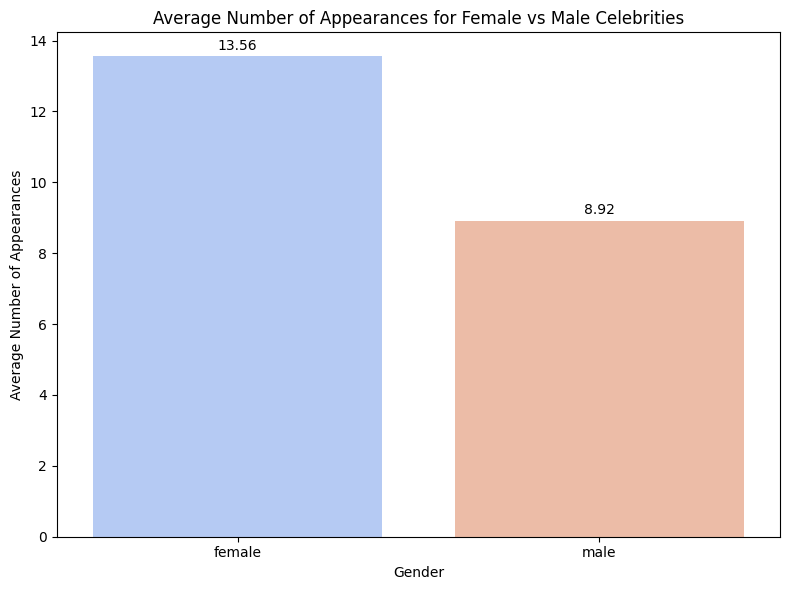

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("/workspace/DS4002Project3/DATA/incorrect_guesses_data.csv")

# Count the appearances for each celebrity in the 'celebrity_name' column
celebrity_counts = df['celebrity_name'].value_counts()

# Merge the celebrity counts with the original dataset to get the 'gender' information
df_counts = df.drop_duplicates(subset='celebrity_name')[['celebrity_name', 'gender']]
df_counts['appearances'] = df_counts['celebrity_name'].map(celebrity_counts)

# Group by gender and calculate the average number of appearances
average_appearances_gender = df_counts.groupby('gender')['appearances'].mean()

# Create a bar graph comparing the average number of appearances for each gender
plt.figure(figsize=(8, 6))
sns.barplot(x=average_appearances_gender.index, y=average_appearances_gender.values, palette='coolwarm')

# Set the labels and title
plt.xlabel('Gender')
plt.ylabel('Average Number of Appearances')
plt.title('Average Number of Appearances for Female vs Male Celebrities')

# Add the average values on top of the bars
for i, v in enumerate(average_appearances_gender.values):
    plt.text(i, v + 0.1, f'{v:.2f}', ha='center', va='bottom', fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()


### It seems that female celebrities were misidentified at a much higher rate than male celebrities. This could be due to a number of reasons. For example, the images chosen of women may have more facial obstructions (such as hairstyles, makeup, etc.), leading the model to get confused. Let's run a t-test to analyze the sigifiance of this result:

In [3]:
import pandas as pd
from scipy import stats

# Load the dataset
df = pd.read_csv("/workspace/DS4002Project3/DATA/incorrect_guesses_data.csv")

# Count the appearances for each celebrity in the 'celebrity_name' column
celebrity_counts = df['celebrity_name'].value_counts()

# Merge the celebrity counts with the original dataset to get the 'gender' information
df_counts = df.drop_duplicates(subset='celebrity_name')[['celebrity_name', 'gender']]
df_counts['appearances'] = df_counts['celebrity_name'].map(celebrity_counts)

# Separate the data into two groups: Male and Female
male_celebs = df_counts[df_counts['gender'] == 'male']['appearances']
female_celebs = df_counts[df_counts['gender'] == 'female']['appearances']

# Perform an independent two-sample t-test
t_stat, p_value = stats.ttest_ind(male_celebs, female_celebs)

# Print the t-statistic and p-value
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpret the result
if p_value < 0.05:
    print("The difference in appearance counts is statistically significant (p < 0.05).")
else:
    print("The difference in appearance counts is not statistically significant (p >= 0.05).")


T-statistic: -2.1781
P-value: 0.0415
The difference in appearance counts is statistically significant (p < 0.05).


### Let's compare the average image brightness values for all of the images in the dataset vs. the ones that were misidentied in the last epoch.

In [9]:
# Load the datasets
df_all_celebs = pd.read_csv("/workspace/DS4002Project3/DATA/all_celebs_image_data.csv")
df_incorrect_guesses = pd.read_csv("/workspace/DS4002Project3/DATA/incorrect_guesses_data.csv")

# Calculate the average brightness for each dataset
avg_brightness_all_celebs = df_all_celebs['brightness'].mean()
avg_brightness_incorrect_guesses = df_incorrect_guesses['brightness'].mean()

# Create a DataFrame to display the results in a table
avg_brightness_table = pd.DataFrame({
    'Dataset': ['all_celebs_image_data.csv', 'incorrect_guesses_data.csv'],
    'Average Brightness': [avg_brightness_all_celebs, avg_brightness_incorrect_guesses]
})

# Display the table
print(avg_brightness_table)

                      Dataset  Average Brightness
0   all_celebs_image_data.csv          111.527535
1  incorrect_guesses_data.csv          103.446180


### There is an apparent difference between the average brightness value in the main dataset vs. in the misidentified images. Let's test the significance of this result:

In [1]:
import pandas as pd
from scipy import stats

# Load the datasets
df_all_celebs = pd.read_csv("/workspace/DS4002Project3/DATA/all_celebs_image_data.csv")
df_incorrect_guesses = pd.read_csv("/workspace/DS4002Project3/DATA/incorrect_guesses_data.csv")

# Extract the brightness columns
brightness_all_celebs = df_all_celebs['brightness']
brightness_incorrect_guesses = df_incorrect_guesses['brightness']

# Perform an independent two-sample t-test
t_stat, p_value = stats.ttest_ind(brightness_all_celebs, brightness_incorrect_guesses)

# Print the t-statistic and p-value
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpret the result
if p_value < 0.05:
    print("The difference is statistically significant (p < 0.05).")
else:
    print("The difference is not statistically significant (p >= 0.05).")


T-statistic: 3.3402
P-value: 0.0008
The difference is statistically significant (p < 0.05).


### Now Looking at colorfulness:

In [4]:
# Load the datasets
df_all_celebs = pd.read_csv("/workspace/DS4002Project3/DATA/all_celebs_image_data.csv")
df_incorrect_guesses = pd.read_csv("/workspace/DS4002Project3/DATA/incorrect_guesses_data.csv")

# Calculate the average brightness for each dataset
avg_colorfulness_all_celebs = df_all_celebs['colorfulness'].mean()
avg_colorfulness_incorrect_guesses = df_incorrect_guesses['colorfulness'].mean()

# Create a DataFrame to display the results in a table
avg_colorfulness_table = pd.DataFrame({
    'Dataset': ['all_celebs_image_data.csv', 'incorrect_guesses_data.csv'],
    'Average Colorfulness': [avg_colorfulness_all_celebs, avg_colorfulness_incorrect_guesses]
})

# Display the table
print(avg_colorfulness_table)

                      Dataset  Average Colorfulness
0   all_celebs_image_data.csv             42.402599
1  incorrect_guesses_data.csv             42.665395


### The average colorfulness values appear to be very similar. Let's test the significance of this result:

In [7]:
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

# Load the datasets
df_all_celebs = pd.read_csv("/workspace/DS4002Project3/DATA/all_celebs_image_data.csv")
df_incorrect_guesses = pd.read_csv("/workspace/DS4002Project3/DATA/incorrect_guesses_data.csv")

# Perform an independent two-sample t-test
t_stat, p_value = stats.ttest_ind(df_all_celebs['colorfulness'], df_incorrect_guesses['colorfulness'])

# Print the t-statistic and p-value
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpret the result
if p_value < 0.05:
    print("The difference in colorfulness values is statistically significant (p < 0.05).")
else:
    print("The difference in colorfulness values is not statistically significant (p >= 0.05).")

# Calculate Cohen's d (effect size)
mean_diff = df_all_celebs['colorfulness'].mean() - df_incorrect_guesses['colorfulness'].mean()
pooled_std = np.sqrt((df_all_celebs['colorfulness'].std()**2 + df_incorrect_guesses['colorfulness'].std()**2) / 2)
cohen_d = mean_diff / pooled_std
print(f"Cohen's d (effect size): {cohen_d:.4f}")


T-statistic: -0.1982
P-value: 0.8429
The difference in colorfulness values is not statistically significant (p >= 0.05).
Cohen's d (effect size): -0.0110


### Finally, we'll look at difference in resolution for images in the main dataset vs. the misidentified image dataset.

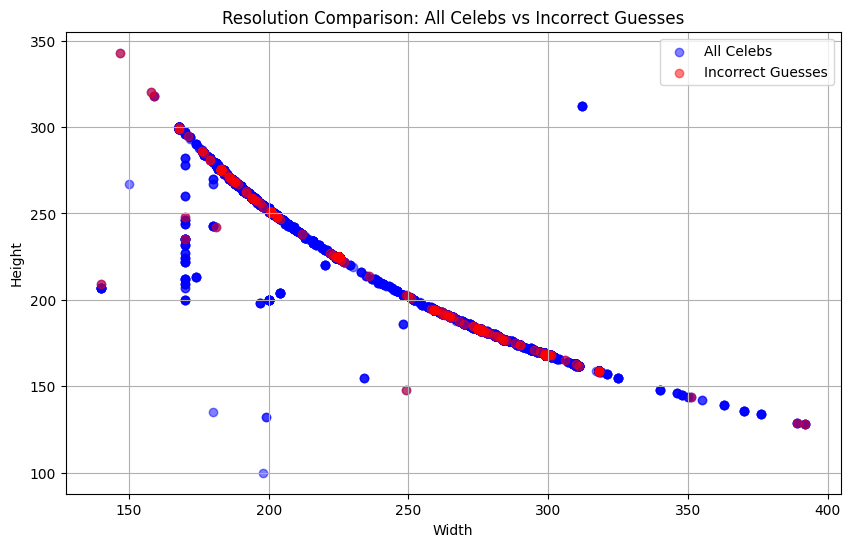

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import os

# Load the datasets
df_all_celebs = pd.read_csv("/workspace/DS4002Project3/DATA/all_celebs_image_data.csv")
df_incorrect_guesses = pd.read_csv("/workspace/DS4002Project3/DATA/incorrect_guesses_data.csv")

# Function to extract resolution (width x height) from image file
def get_resolution(file_path):
    try:
        with Image.open(file_path) as img:
            return img.size  # Returns (width, height)
    except Exception as e:
        print(f"Error opening {file_path}: {e}")
        return None

# Extract resolution for all_celebs dataset
df_all_celebs['resolution'] = df_all_celebs['file_path'].apply(get_resolution)
df_all_celebs = df_all_celebs.dropna(subset=['resolution'])  # Drop rows with invalid resolution
df_all_celebs['width'], df_all_celebs['height'] = zip(*df_all_celebs['resolution'])

# Extract resolution for incorrect_guesses dataset
df_incorrect_guesses['resolution'] = df_incorrect_guesses['file_path'].apply(get_resolution)
df_incorrect_guesses = df_incorrect_guesses.dropna(subset=['resolution'])  # Drop rows with invalid resolution
df_incorrect_guesses['width'], df_incorrect_guesses['height'] = zip(*df_incorrect_guesses['resolution'])

# Scatterplot for image resolutions (width vs height)
plt.figure(figsize=(10, 6))

# Plot all_celebs dataset
plt.scatter(df_all_celebs['width'], df_all_celebs['height'], color='blue', alpha=0.5, label='All Celebs')

# Plot incorrect_guesses dataset
plt.scatter(df_incorrect_guesses['width'], df_incorrect_guesses['height'], color='red', alpha=0.5, label='Incorrect Guesses')

# Adding labels and title
plt.xlabel('Width')
plt.ylabel('Height')
plt.title('Resolution Comparison: All Celebs vs Incorrect Guesses')
plt.legend()
plt.grid(True)
plt.show()

### Now, let's run a significance test to compare the difference in average height & width resolution values between misidentified images & the full dataset:

In [10]:
# Load the datasets
df_all_celebs = pd.read_csv("/workspace/DS4002Project3/DATA/all_celebs_image_data.csv")
df_incorrect_guesses = pd.read_csv("/workspace/DS4002Project3/DATA/incorrect_guesses_data.csv")

# Function to extract resolution (width x height) from image file
def get_resolution(file_path):
    try:
        with Image.open(file_path) as img:
            return img.size  # Returns (width, height)
    except Exception as e:
        print(f"Error opening {file_path}: {e}")
        return None

# Extract resolution for all_celebs dataset
df_all_celebs['resolution'] = df_all_celebs['file_path'].apply(get_resolution)
df_all_celebs = df_all_celebs.dropna(subset=['resolution'])  # Drop rows with invalid resolution
df_all_celebs['width'], df_all_celebs['height'] = zip(*df_all_celebs['resolution'])

# Extract resolution for incorrect_guesses dataset
df_incorrect_guesses['resolution'] = df_incorrect_guesses['file_path'].apply(get_resolution)
df_incorrect_guesses = df_incorrect_guesses.dropna(subset=['resolution'])  # Drop rows with invalid resolution
df_incorrect_guesses['width'], df_incorrect_guesses['height'] = zip(*df_incorrect_guesses['resolution'])

# Calculate averages for width and height in both datasets
avg_width_all_celebs = df_all_celebs['width'].mean()
avg_height_all_celebs = df_all_celebs['height'].mean()

avg_width_incorrect_guesses = df_incorrect_guesses['width'].mean()
avg_height_incorrect_guesses = df_incorrect_guesses['height'].mean()

# Print the average width and height for both datasets
print(f"Average Width (All Celebs): {avg_width_all_celebs:.2f}")
print(f"Average Height (All Celebs): {avg_height_all_celebs:.2f}")

print(f"Average Width (Incorrect Guesses): {avg_width_incorrect_guesses:.2f}")
print(f"Average Height (Incorrect Guesses): {avg_height_incorrect_guesses:.2f}")

# Perform t-test on width
t_stat_width, p_value_width = stats.ttest_ind(df_all_celebs['width'], df_incorrect_guesses['width'])

# Perform t-test on height
t_stat_height, p_value_height = stats.ttest_ind(df_all_celebs['height'], df_incorrect_guesses['height'])

# Print results for width
print(f"T-statistic for width: {t_stat_width:.4f}")
print(f"P-value for width: {p_value_width:.4f}")

# Print results for height
print(f"T-statistic for height: {t_stat_height:.4f}")
print(f"P-value for height: {p_value_height:.4f}")

# Interpret the results
if p_value_width < 0.05:
    print("The difference in width between the two datasets is statistically significant (p < 0.05).")
else:
    print("The difference in width between the two datasets is not statistically significant (p >= 0.05).")

if p_value_height < 0.05:
    print("The difference in height between the two datasets is statistically significant (p < 0.05).")
else:
    print("The difference in height between the two datasets is not statistically significant (p >= 0.05).")


Average Width (All Celebs): 247.72
Average Height (All Celebs): 210.47
Average Width (Incorrect Guesses): 241.87
Average Height (Incorrect Guesses): 216.16
T-statistic for width: 2.0859
P-value for width: 0.0370
T-statistic for height: -2.2986
P-value for height: 0.0215
The difference in width between the two datasets is statistically significant (p < 0.05).
The difference in height between the two datasets is statistically significant (p < 0.05).
